In [1]:
import numpy as np
import pandas as pd

from GP_SPGP import GP_SPGP_regression, plot_gp
np.random.seed(36)

In [2]:
# Load simple dataset from www.gatsby.ucl.ac.uk/∼snelson/ 
# 1D 200 inputs points, 300 test points
trainset = pd.read_csv("1D_train.csv").to_numpy()

testset = pd.read_csv("1D_test.csv").to_numpy()

# Get the X and Y
X_train = np.expand_dims(trainset[:,0],axis=1)
Y_train = np.expand_dims(trainset[:,1],axis=1)
X_test =  np.expand_dims(testset[:,0],axis=1)

In [3]:
X_induced0 = X_train[np.random.choice(X_train.shape[0],size = 15) , :].reshape(-1)
X_induced_flat0 = X_induced0.flatten()

In [4]:
GP = GP_SPGP_regression()
theta0 = np.array([1.0,1.0])
noise0 = np.array([0.3])
GP.fit(X_train, Y_train, params0=np.concatenate([theta0, X_induced_flat0,noise0]), m=X_induced0.shape[0], noise_estimation=True)

         Current function value: 57.221975
         Iterations: 6
         Function evaluations: 1114
         Gradient evaluations: 58
Final negative log marginal likelihood: [57.22197531]


In [5]:
print("Length: ", GP.theta[0], ", Scale: ", GP.theta[1], ", Noise: ", GP.noise)

Length:  0.7009092750629446 , Scale:  1.567194044071716 , Noise:  0.2787892886072702


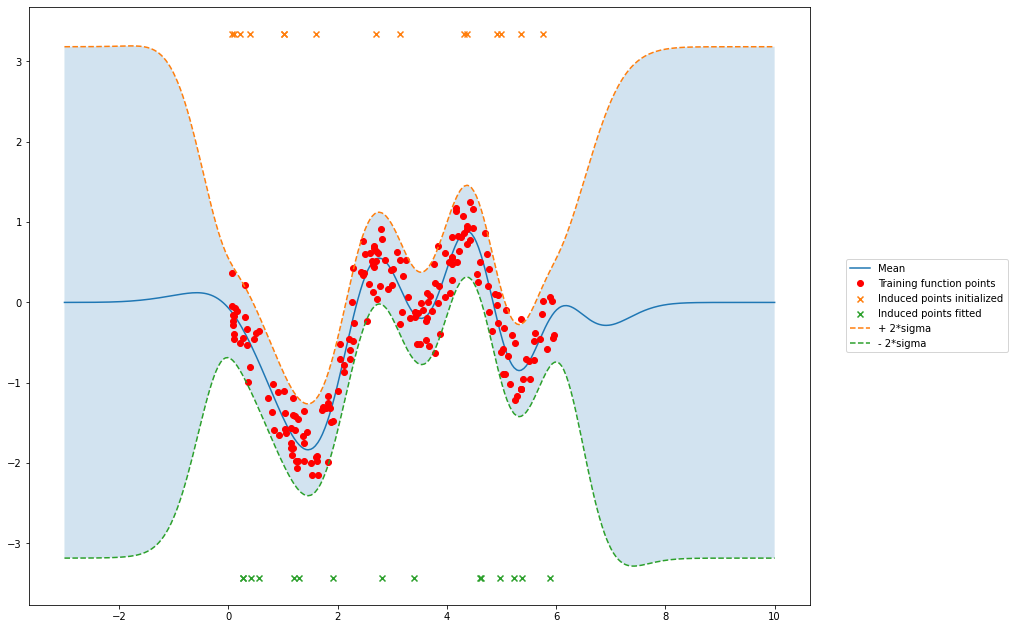

In [6]:
mu_s, cov_s = GP.predict(X_test, X_train, GP.X_induced_flat, Y_train, theta=GP.theta, noise=GP.noise)

plot_gp(mu_s, cov_s, X_test, X_induced_flat0, GP.X_induced_flat, X_train=X_train, Y_train=Y_train)


# With different training size

## n = 20, m = 15

In [7]:
sorted_idx = np.argsort(X_train.flatten())
n = X_train.shape[0]
X_train_sorted = X_train[sorted_idx]
Y_train_sorted = Y_train[sorted_idx]

X_train_20 = X_train_sorted[np.arange(1,n,10)]

Y_train_20 = Y_train_sorted[np.arange(1,n,10)]

X_induced0 = X_train[np.random.choice(X_train.shape[0],size = 15) , :]
X_induced0.shape
X_induced_flat0 = X_induced0.flatten()

In [8]:
theta0 = np.array([1.0,1.0])
noise0 = np.array([0.3])

GP = GP_SPGP_regression()
GP.fit(X_train_20, Y_train_20, params0=np.concatenate([theta0, X_induced_flat0,noise0]), m=X_induced0.shape[0],noise_estimation=True)
mu_s, cov_s = GP.predict(X_test, X_train_20, GP.X_induced_flat, Y_train_20, theta=GP.theta, noise=GP.noise)
print("Noise:",GP.noise, "| (length,scale):",GP.theta)

         Current function value: 19.950112
         Iterations: 27
         Function evaluations: 2160
         Gradient evaluations: 113
Final negative log marginal likelihood: [19.95011202]
Noise: 0.4037395858093679 | (length,scale): [0.85101866 1.32993779]


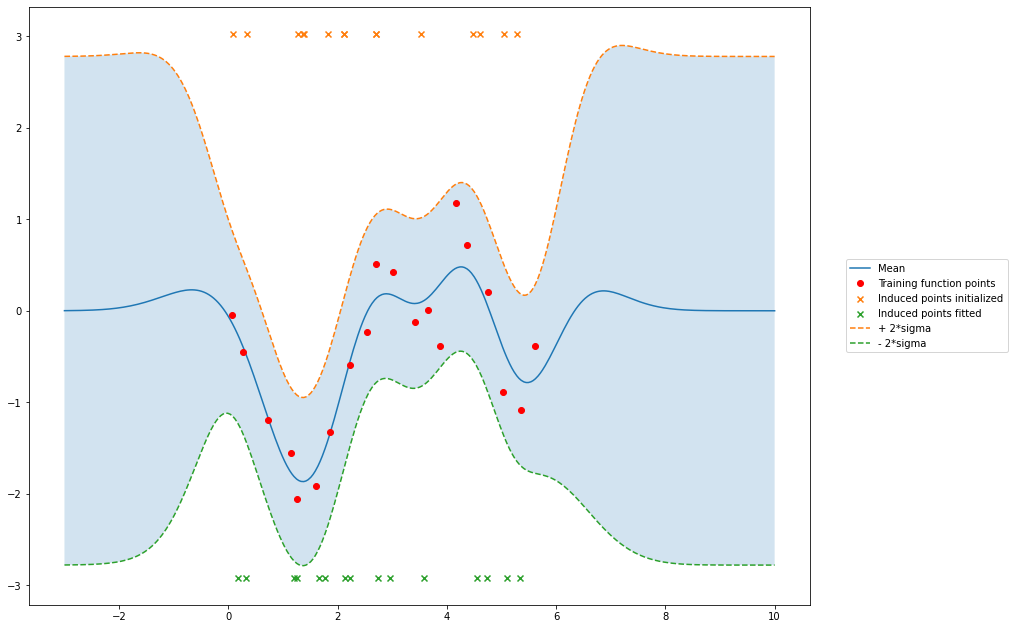

In [9]:
plot_gp(mu_s, cov_s, X_test, X_induced_flat0, GP.X_induced_flat, X_train=X_train_20, Y_train=Y_train_20)

This figure is different from the one in the report due to an update of the code. We can thus not comment on that figure.

There is still a bigger difference between the values of true log marginal likelihood and the approximate log marginal likelihood provided by the SPGP method than the variational method. 
